# Variable Importance

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import sys 
import datetime as dt
import statsmodels.api as sm


import sys
sys.path.append('..')

from src.features.build_features import make_rff
from src.utils.utils import unpack_results
from src.visualization.visualize import plot_broken_x

In [6]:
variables = ['dfy', 'infl', 'svar', 'de', 'lty', 'tms', 'tbl', 'dfr', 'dp', 'dy', 'ltr', 'ep', 'b/m', 'ntis', 'mr']

In [7]:
data = pd.read_csv("../data/processed/processed_data.csv", index_col=0, parse_dates=True)

In [8]:
seed = 1
to_seed = 1000
interim_data_path = "../data/interim/simulation_outputs_voc_solver"
preprocessed_data_path = "../data/processed/processed_data.csv"
save_path = "reports/figures/curves_voc_solver"

with open(interim_data_path + "/config.json", 'r') as fp:
    config = json.load(fp)
    last_run_seed = config['last_run_seed']
    gamma = config['gamma']
    T_list = config['T_list']
    z_list = config['z_list']
    P_dict = config['P_dict']
    P_max = 12000
    delta_t = config['delta_t']

data = pd.read_csv(preprocessed_data_path, index_col=0, parse_dates=True)
dates = data#.index[min(12):]

interim_data = pd.read_csv('../data/interim/formatted_goyal_data.csv', index_col=0, parse_dates=True)
interim_data = interim_data.loc[interim_data.index > dt.datetime(1927, 1, 1)]

realized_R = interim_data.R#.iloc[12:]
sigma_R = (realized_R**2).rolling(12).mean().apply(np.sqrt) 

In [9]:
data = pd.read_csv(preprocessed_data_path, index_col=0, parse_dates=True)
dates = data.index[min(T_list):]

interim_data = pd.read_csv('../data/interim/formatted_goyal_data.csv', index_col=0, parse_dates=True)
interim_data = interim_data.loc[interim_data.index > dt.datetime(1927, 1, 1)]

realized_R = interim_data.R
sigma_R = (realized_R**2).rolling(12).mean().apply(np.sqrt) 

run_params_unpacking = (T_list, P_dict, z_list) 

In [10]:
b = np.load(f"{interim_data_path}/beta_norm_sq/{seed:04}beta_norm_sq.npy")
r = np.load(f"{interim_data_path}/return_forecasts/{seed:04}return_forecasts.npy")
sr = np.load(f"{interim_data_path}/strategy_returns/{seed:04}strategy_returns.npy")


In [11]:
beta_norm_sq_df, return_forecasts_df, strategy_returns_df = unpack_results((b, r, sr), run_params_unpacking, dates)


In [12]:
beta_norm_sq_df

T                12                                                         \
P              1                                                             
z           0.001     0.010     0.100     1.000     10.000        100.000    
date                                                                         
1930-12-31       NaN       NaN       NaN       NaN       NaN           NaN   
1931-01-31  0.088167  0.086481  0.071983  0.020440  0.000636  7.449020e-06   
1931-02-28  0.194115  0.190714  0.161108  0.049238  0.001645  1.954712e-05   
1931-03-31  0.317619  0.312068  0.263738  0.080780  0.002704  3.215440e-05   
1931-04-30  0.156344  0.153650  0.130147  0.040323  0.001366  1.627754e-05   
...              ...       ...       ...       ...       ...           ...   
2022-08-31  0.064979  0.063940  0.054793  0.018038  0.000651  7.865877e-06   
2022-09-30  0.062695  0.061573  0.051834  0.015565  0.000511  6.049768e-06   
2022-10-31  0.035941  0.035299  0.029722  0.008935  0.000294  3.477567e-06   
2022-11-30  0.020832  0.020456  0.017197  0.005128  0.000167  1.976725e-06   
2022-12-31  0.006696  0.006567  0.005462  0.001544  0.000048  5.599263e-07   

T                                                       ...       120  \
P                            3                          ...     6000    
z               1000.000  0.001     0.010     0.100     ...  10.000     
date                                                    ...             
1930-12-31           NaN       NaN       NaN       NaN  ...       NaN   
1931-01-31  7.573675e-08  0.081175  0.080140  0.070836  ...       NaN   
1931-02-28  1.990468e-07  0.261754  0.257285  0.218763  ...       NaN   
1931-03-31  3.274416e-07  0.359083  0.352580  0.296768  ...       NaN   
1931-04-30  1.658037e-07  0.376973  0.368630  0.298950  ...       NaN   
...                  ...       ...       ...       ...  ...       ...   
2022-08-31  8.023855e-08  0.290050  0.279994  0.204288  ...  0.014699   
2022-09-30  6.158063e-08  0.259425  0.251282  0.189724  ...  0.014726   
2022-10-31  3.539903e-08  1.461917  1.353483  0.720741  ...  0.014953   
2022-11-30  2.011810e-08  0.870568  0.841291  0.619081  ...  0.015079   
2022-12-31  5.692474e-09  1.020251  0.981431  0.695888  ...  0.015137   

T                                                                       \
P                                  12000                                 
z           100.000   1000.000  0.001     0.010     0.100     1.000      
date                                                                     
1930-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1931-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-08-31  0.002307  0.000050  0.010631  0.010629  0.010607  0.010394   
2022-09-30  0.002314  0.000051  0.010651  0.010649  0.010627  0.010414   
2022-10-31  0.002352  0.000051  0.010819  0.010817  0.010795  0.010579   
2022-11-30  0.002376  0.000052  0.010916  0.010914  0.010891  0.010674   
2022-12-31  0.002388  0.000052  0.010963  0.010961  0.010938  0.010720   

T                                         
P                                         
z           10.000    100.000   1000.000  
date                                      
1930-12-31       NaN       NaN       NaN  
1931-01-31       NaN       NaN       NaN  
1931-02-28       NaN       NaN       NaN  
1931-03-31       NaN       NaN       NaN  
1931-04-30       NaN       NaN       NaN  
...              ...       ...       ...  
2022-08-31  0.008618  0.002577  0.000093  
2022-09-30  0.008635  0.002583  0.000093  
2022-10-31  0.008776  0.002625  0.000094  
2022-11-30  0.008857  0.002651  0.000095  
2022-12-31  0.008895

In [13]:
end_date =  dt.datetime(2025, 1, 1) 
idx_mask = beta_norm_sq_df.index < end_date
beta_norm_sq_df = beta_norm_sq_df.loc[idx_mask]
return_forecasts_df = return_forecasts_df.loc[idx_mask]
strategy_returns_df = strategy_returns_df.loc[idx_mask]

# rescale strategy returns, because they are scaled by vola
return_forecasts_rescaled = return_forecasts_df.multiply(sigma_R, axis=0)
strategy_returns_rescaled = strategy_returns_df.multiply(sigma_R, axis=0)


In [14]:
strategy_returns_rescaled.head(50)

T                12                                                     \
P              1                                                         
z           0.001     0.010     0.100     1.000     10.000    100.000    
date                                                                     
1927-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1927-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1927-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1927-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1927-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1927-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
1927-07-31       NaN       NaN       NaN       NaN       NaN       NaN   
1927-08-31       NaN       NaN       NaN       NaN       NaN       NaN   
1927-09-30       NaN       NaN       NaN       NaN       NaN       NaN   
1927-10-31       NaN       NaN       NaN       NaN       NaN       NaN   
1927-11-30       NaN       NaN       NaN       NaN       NaN       NaN   
1927-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1928-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1928-02-29       NaN       NaN       NaN       NaN       NaN       NaN   
1928-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1928-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1928-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1928-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
1928-07-31       NaN       NaN       NaN       NaN       NaN       NaN   
1928-08-31       NaN       NaN       NaN       NaN       NaN       NaN   
1928-09-30       NaN       NaN       NaN       NaN       NaN       NaN   
1928-10-31       NaN       NaN       NaN       NaN       NaN       NaN   
1928-11-30       NaN       NaN       NaN       NaN       NaN       NaN   
1928-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1929-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1929-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1929-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1929-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1929-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1929-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
1929-07-31       NaN       NaN       NaN       NaN       NaN       NaN   
1929-08-31       NaN       NaN       NaN       NaN       NaN       NaN   
1929-09-30       NaN       NaN       NaN       NaN       NaN       NaN   
1929-10-31       NaN       NaN       NaN       NaN       NaN       NaN   
1929-11-30       NaN       NaN       NaN       NaN       NaN       NaN   
1929-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1930-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1930-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1930-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1930-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1930-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1930-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
1930-07-31       NaN       NaN       NaN       NaN       NaN       NaN   
1930-08-31       NaN       NaN       NaN       NaN       NaN       NaN   
1930-09-30       NaN       NaN       NaN       NaN       NaN       NaN   
1930-10-31       NaN       NaN       NaN       NaN       NaN       NaN   
1930-11-30       NaN       NaN       NaN       NaN       NaN       NaN   
1930-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-01-31  0.016262  0.016106  0.014694  0.007830  0.001381  0.000149   
1931-02-28  0.067487  0.066893  0.061482  0.033989  0.006212  0.000677   

T  

In [15]:
mean_beta_norm_sq = beta_norm_sq_df.mean().unstack()
beta_norm = np.sqrt(mean_beta_norm_sq) # in VoC paper they plotted square root of norm of beta
beta_norm = beta_norm.reset_index()
beta_norm['c'] = beta_norm['P']/beta_norm['T']
beta_norm

In [42]:
def plot_broken_x(df, T, z_list, y_label, save_path, ytype=None):
    f, (ax, ax2) = plt.subplots(1, 2, width_ratios=[3, 1], sharey=True)
    f.subplots_adjust(hspace=0.05)  # adjust space between axes

    df = df.loc[df['T']==T]
    x = df['c'].values
    y = df.loc[:, z_list].values

    # add vertical line at c=1
    ax.axvline(x=1,  color='0.7', linestyle='--')

    # plot the same data on both axes
    ax.plot(x, y)
    ax2.plot(x, y)

    if T==12:
        ax.set_xlim(0, 50)
        ax2.set_xlim(990, 1000)
    elif T==60:
        ax.set_xlim(0, 10)
        ax2.set_xlim(195, 200)
    elif T==120:
        ax.set_xlim(0, 10)
        ax2.set_xlim(95, 100)
    else:
        raise ValueError('T must be 12, 60 or 120')

    # in case ytype is specified, set y limits like in VoC, for comparison
    # with the original plots 
    if ytype == "r2":
        ax.set_ylim(-3, 0)
        ax2.set_ylim(-3, 0)
    elif ytype == "beta":
        ax.set_ylim(0, 3)
        ax2.set_ylim(0, 3)
    elif ytype == "er":
        ax.set_ylim(0, 0.04)
        ax2.set_ylim(0, 0.04)
    elif ytype == "vola":
        ax.set_ylim(0, 5)
        ax2.set_ylim(0, 5)
    elif ytype == "sr":
        ax.set_ylim(0, 5) # TODO to be mached ...
        ax2.set_ylim(0, 5)
    else:
        pass

    ax.set_ylabel(y_label)
    ax2.legend(z_list, title='z')
    f.suptitle(f'T={T}')

    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.yaxis.tick_left()
    ax2.yaxis.tick_right()

    plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

    # set x label but place it at the center of the figure
    f.text(0.5, 0.04, 'c', ha='center', va='center')

    d = 0.02 # .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1-d, 1+d), (-d, +d), **kwargs)
    ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-3*d, +3*d), (1-d, 1+d), **kwargs) # 3 corrects for ratio of subplot widths
    ax2.plot((-3*d, +3*d), (-d, +d), **kwargs)

    plt.show()
    plt.close()

    return None # f, (ax, ax2)

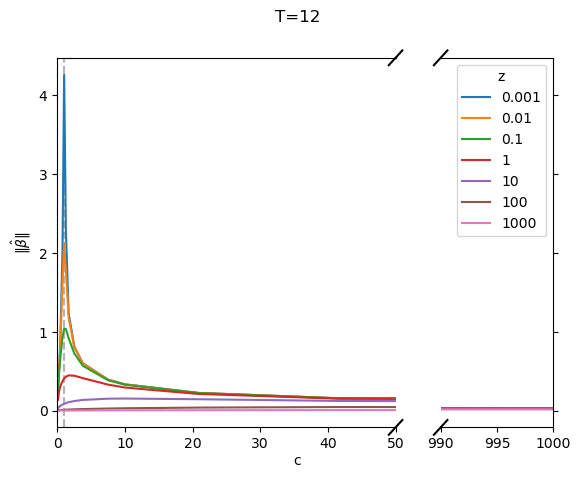

In [43]:
plot_broken_x(beta_norm, 12, z_list, 
            y_label=r'$\| \hat {\beta}\|$', 
            save_path=f"{save_path}/Xbeta-t{999}.png")

NameError: name 'Y' is not defined